### Import necessary libraries 

In [147]:
import pymysql

# Function to create a connection to the MySQL database
def create_connection():
    connection = None
    try:
        connection = pymysql.connect(
            host='localhost',  # Replace with your host, e.g., 'localhost'
            user='root',  # Replace with your MySQL username
            password='',  # Your MySQL password
            database='datacoll'  # Replace with your database name
        )
        print("Connection successful")
    except Exception as e:
        print(f"Error: '{e}'")

    return connection

# Function to execute a read query (e.g., SELECT statements)
def execute_read_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Exception as e:
        print(f"Error: '{e}'")
        return None

# Function to execute a write query (e.g., INSERT, UPDATE, DELETE statements)
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Exception as e:
        print(f"Error: '{e}'")

# Establish a connection
connection = create_connection()

# Read Data from 'stdinfo' Table
select_stdinfo_query = "SELECT * FROM stdinfo;"
stdinfo_result = execute_read_query(connection, select_stdinfo_query)

# Print the results from 'stdinfo'
print("Data from stdinfo table:")
if stdinfo_result:
    for row in stdinfo_result:
        print(row)

# Read Data from 'stdgrade' Table
select_stdgrade_query = "SELECT * FROM stdgrade;"
stdgrade_result = execute_read_query(connection, select_stdgrade_query)

# Print the results from 'stdgrade'
print("\nData from stdgrade table:")
if stdgrade_result:
    for row in stdgrade_result:
        print(row)

# Insert Data into 'stdinfo' Table
# Replace 'name' with the actual column name and make sure the student_id is unique
insert_stdinfo_query = """
INSERT INTO stdinfo (student_id, name, age) VALUES (2, 'Jane Doe', 20)
ON DUPLICATE KEY UPDATE name='Jane Doe', age=20;
"""
execute_query(connection, insert_stdinfo_query)

# Insert Data into 'stdgrade' Table
# Assuming the stdgrade table has student_id and grade
insert_stdgrade_query = """
INSERT INTO stdgrade (student_id, grade) VALUES (2, 3.5)
ON DUPLICATE KEY UPDATE grade=3.5;
"""
execute_query(connection, insert_stdgrade_query)

# Join 'stdinfo' and 'stdgrade' Tables
join_query = """
SELECT stdinfo.student_id, stdinfo.name, stdinfo.age, stdgrade.grade
FROM stdinfo
JOIN stdgrade ON stdinfo.student_id = stdgrade.student_id;
"""
join_result = execute_read_query(connection, join_query)

# Print the joined results
print("\nJoined data from stdinfo and stdgrade tables:")
if join_result:
    for row in join_result:
        print(row)

# Close the connection
if connection:
    connection.close()


Connection successful
Data from stdinfo table:
(2, 'Jane Doe', 20, None)

Data from stdgrade table:
(1, '', 0.0)
(2, '', 3.5)
Query executed successfully
Query executed successfully

Joined data from stdinfo and stdgrade tables:
(2, 'Jane Doe', 20, 3.5)


In [148]:
import pandas as pd   
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

# Handling Missing Values 
from sklearn.impute import SimpleImputer

# SMOTE 
from imblearn.over_sampling import SMOTE

# Standarlization 
from sklearn.preprocessing import StandardScaler

# For pipeline to avoid data leakage 
from imblearn.pipeline import Pipeline as ImbPipeline

# Cross Validation purposes 
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    GridSearchCV

)

# Training Model 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluator for testing 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay

Importing functions that will generate synthetic data 

Student contains name, year, student number.  
GrdSystem contains the individual grades per subject, the calculator for computing grades (Based on student handbook), and the indicator of the student status (Regular or Irregular).    
S_H_Survey will give the answers of the student, each factor have 3 questions 

In [150]:
from stdInfo import Student

student = Student(624)
student_info = student.std_info_dt()
print(student_info)

                Name  Year Student Number
0      Allison Jones     4       21626446
1       Maria Thomas     1       24341235
2       Steve Nelson     1       24051074
3    Amanda Martinez     4       21628754
4        Debra Kelly     4       21900964
..               ...   ...            ...
619   Bryan Browning     4       21079529
620  Jessica Bennett     2       23214780
621       George Kim     3       22622021
622   Amanda Sanchez     4       21745353
623   James Williams     3       22068642

[624 rows x 3 columns]


In [151]:
from stdGrade import GrdSystem

students = GrdSystem(624)
student_grades = students.overall_dt_stdGrades()
print(student_grades)

                Name  Year Student Number  Subject_1  Subject_2  Subject_3  \
0    Curtis Martinez     1       24698211       1.00       2.25       2.50   
1      Amanda Miller     4       21803479       2.50       1.25       1.25   
2        Drew Lawson     4       21812617       3.00       2.50       1.25   
3        David Cowan     1       24201142       2.75       1.00       1.00   
4    Michelle Walker     1       24208981       1.75       1.25       1.25   
..               ...   ...            ...        ...        ...        ...   
619      David Beard     2       23164781       2.50       1.00       2.50   
620    Craig Lambert     3       22658712       3.00       2.25       2.50   
621     Walter Payne     1       24129215       1.75       1.00       2.00   
622    Brian Gilbert     2       23166330       2.50       4.00       2.00   
623    Jamie Carlson     3       22325007       2.75       5.00       2.75   

     Subject_4  Subject_5     Status  Subject_6  Subject_7  Sub

In [152]:
from StudyHbtsSurvey import S_H_Survey

survey = S_H_Survey(624, Total_respondents= 624, Respondents_ans=531)
student_survey = survey.std_info_and_survey()
print(student_survey)

                   Name  Year Student Number Homework_Question_1  \
0           Lisa Foster     1       24844794               Agree   
1       Victoria Potter     1       24776021               Agree   
2    Christopher Graham     1       24353089   Strongly Disagree   
3          Jason Newman     1       24066093      Strongly Agree   
4            Brian Ward     1       24995961   Strongly Disagree   
..                  ...   ...            ...                 ...   
619         April Smith     3       22955357                 NaN   
620   Lindsay Schroeder     4       21985245                 NaN   
621      Michael Weaver     4       21519824                 NaN   
622   Clarence Robinson     2       23396596                 NaN   
623          Billy Cook     1       24756935                 NaN   

    Homework_Question_2 Homework_Question_3 Time Allocation_Question_1  \
0                 Agree      Strongly Agree             Strongly Agree   
1                 Agree   Strongly 

Merging dataframes

In [154]:
merged_data = pd.merge(student_grades, student_survey, how= "left", on= ["Student Number", "Name", "Year"])
merged_data

,Name,Year,Student Number,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Status,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers Consultation_Question_1,Teachers Consultation_Question_2,Teachers Consultation_Question_3
0,Curtis Martinez,1,24698211,1.00,2.25,2.50,2.75,1.75,Regular,NaN,NaN,NaN,2.12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amanda Miller,4,21803479,2.50,1.25,1.25,1.25,3.00,Regular,NaN,NaN,NaN,1.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Drew Lawson,4,21812617,3.00,2.50,1.25,3.00,2.25,Regular,NaN,NaN,NaN,2.40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,David Cowan,1,24201142,2.75,1.00,1.00,2.25,2.25,Regular,NaN,NaN,NaN,1.79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michelle Walker,1,24208981,1.75,1.25,1.25,1.75,1.75,Regular,NaN,NaN,NaN,1.54,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,David Beard,2,23164781,2.50,1.00,2.50,2.75,3.00,Regular,3.00,2.00,1.0,2.21,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,Craig Lambert,3,22658712,3.00,2.25,2.50,2.25,2.50,Irregular,1.75,5.00,NaN,2.75,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,Walter Payne,1,24129215,1.75,1.00,2.00,1.75,2.25,Regular,NaN,NaN,NaN,1.75,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,Brian Gilbert,2,23166330,2.50,4.00,2.00,2.50,1.25,Irregular,2.25,2.50,4.0,2.63,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Understanding dataframes 

In [156]:
merged_data.shape

(624, 35)

In [157]:
merged_data.dtypes

Name                                   object
Year                                    int64
Student Number                         object
Subject_1                             float64
Subject_2                             float64
Subject_3                             float64
Subject_4                             float64
Subject_5                             float64
Status                                 object
Subject_6                             float64
Subject_7                             float64
Subject_8                             float64
Final Grade                           float64
Subjects Failed                         int64
Homework_Question_1                    object
Homework_Question_2                    object
Homework_Question_3                    object
Time Allocation_Question_1             object
Time Allocation_Question_2             object
Time Allocation_Question_3             object
Reading and Note Taking_Question_1     object
Reading and Note Taking_Question_2

In [158]:
merged_data.describe()

,Year,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,324.000000,324.000000,166.000000,624.000000,624.000000
mean,2.431090,2.460337,2.436699,2.417067,2.431090,2.434295,2.469136,2.462191,2.289157,2.437115,1.131410
std,1.099421,1.129518,1.153802,1.157636,1.130286,1.136143,1.176974,1.170753,1.037174,0.461929,0.984001
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000,0.000000
25%,1.000000,1.500000,1.500000,1.500000,1.500000,1.500000,1.687500,1.500000,1.500000,2.100000,0.000000
50%,2.000000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.000000,2.430000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.750000,2.720000,2.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.150000,5.000000


Cleaning the data 

In [160]:
#Checking Duplicates 

merged_data.duplicated().sum()

0

In [161]:
#Checking null values 

merged_data.isnull().sum()

Name                                    0
Year                                    0
Student Number                          0
Subject_1                               0
Subject_2                               0
Subject_3                               0
Subject_4                               0
Subject_5                               0
Status                                  0
Subject_6                             300
Subject_7                             300
Subject_8                             458
Final Grade                             0
Subjects Failed                         0
Homework_Question_1                   624
Homework_Question_2                   624
Homework_Question_3                   624
Time Allocation_Question_1            624
Time Allocation_Question_2            624
Time Allocation_Question_3            624
Reading and Note Taking_Question_1    624
Reading and Note Taking_Question_2    624
Reading and Note Taking_Question_3    624
Study Period Procedures_Question_1

In [162]:
#Dropping unnecessary columns 

merged_data.columns 

Index(['Name', 'Year', 'Student Number', 'Subject_1', 'Subject_2', 'Subject_3',
       'Subject_4', 'Subject_5', 'Status', 'Subject_6', 'Subject_7',
       'Subject_8', 'Final Grade', 'Subjects Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time Allocation_Question_1', 'Time Allocation_Question_2',
       'Time Allocation_Question_3', 'Reading and Note Taking_Question_1',
       'Reading and Note Taking_Question_2',
       'Reading and Note Taking_Question_3',
       'Study Period Procedures_Question_1',
       'Study Period Procedures_Question_2',
       'Study Period Procedures_Question_3', 'Written Works_Question_1',
       'Written Works_Question_2', 'Written Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers Consultation_Question_1',
       'Teachers Consultation_Question_2', 'Teachers Consultation_Question_3'],
      dtype='object')

In [163]:
merged_data = merged_data[[#'Name', 
        'Year', 
    #    'Student Number', 
    #    'Subject_1', 'Subject_2', 'Subject_3',
    #    'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
    #    'Subject_8', 
       'Final Grade', 'Subjects Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time Allocation_Question_1', 'Time Allocation_Question_2',
       'Time Allocation_Question_3', 'Reading and Note Taking_Question_1',
       'Reading and Note Taking_Question_2',
       'Reading and Note Taking_Question_3',
       'Study Period Procedures_Question_1',
       'Study Period Procedures_Question_2',
       'Study Period Procedures_Question_3', 'Written Works_Question_1',
       'Written Works_Question_2', 'Written Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers Consultation_Question_1',
       'Teachers Consultation_Question_2', 'Teachers Consultation_Question_3', 'Status']].copy()

In [164]:
merged_data.head()

,Year,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers Consultation_Question_1,Teachers Consultation_Question_2,Teachers Consultation_Question_3,Status
0,1,2.12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular
1,4,1.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular
2,4,2.40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular
3,1,1.79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular
4,1,1.54,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular


In [165]:
# Renaming Columns 

merged_data = merged_data.rename(columns = { 
    "Final Grade" : "Final_Grade",
    "Subjects Failed" : "Subjects_Failed",
    "Time Allocation_Question_1" : "Time_Allocation_Question_1",
    "Time Allocation_Question_2" : "Time_Allocation_Question_2",
    "Time Allocation_Question_3" : "Time_Allocation_Question_3",
    "Reading and Note Taking_Question_1" : "Reading_and_Note_Taking_Question_1",
    "Reading and Note Taking_Question_2" : "Reading_and_Note_Taking_Question_2",
    "Reading and Note Taking_Question_3" : "Reading_and_Note_Taking_Question_3",
    "Study Period Procedures_Question_1" : "Study_Period_Procedures_Question_1",
    "Study Period Procedures_Question_2" : "Study_Period_Procedures_Question_2",
    "Study Period Procedures_Question_3" : "Study_Period_Procedures_Question_3",
    "Written Works_Question_1" : "Written_Works_Question_1",
    "Written Works_Question_2" : "Written_Works_Question_2",
    "Written Works_Question_3" : "Written_Works_Question_3", 
    "Teachers Consultation_Question_1": "Teachers_Consultation_Question_1",
    "Teachers Consultation_Question_2": "Teachers_Consultation_Question_2",
    "Teachers Consultation_Question_3": "Teachers_Consultation_Question_3"
})

In [166]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
0,1,2.12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular
1,4,1.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular
2,4,2.40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular
3,1,1.79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular
4,1,1.54,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular


Some data are in object, we need to convert it to numerical for better understading 

In [168]:
# Converting Ordinal data to Numerical Data

survey_Columns = ['Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
        'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3']

for columns in survey_Columns:
    merged_data[columns] = merged_data[columns].map({
        'Strongly Disagree' : 1, 
        'Disagree' : 2, 
        'Agree': 3, 
        'Strongly Agree' : 4
    })

In [169]:
# Converting Ordinal data to Numerical Data

status_map = {
    "Regular": 1, 
    "Irregular": 0
}

merged_data['Status'] = merged_data['Status'].map(status_map)

In [170]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
0,1,2.12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4,1.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,4,2.40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1,1.79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1,1.54,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [171]:
#Handling missing values by imputing 

# List of columns to impute
col_to_impute = ['Homework_Question_1', 'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2', 'Time_Allocation_Question_3',
       'Reading_and_Note_Taking_Question_1', 'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3', 'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2', 'Study_Period_Procedures_Question_3',
       'Written_Works_Question_1', 'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2', 'Examination_Question_3',
       'Teachers_Consultation_Question_1', 'Teachers_Consultation_Question_2',
       'Teachers_Consultation_Question_3']

# Ensure that the columns to be imputed are numeric, converting non-numeric entries to NaN
merged_data[col_to_impute] = merged_data[col_to_impute].apply(pd.to_numeric, errors='coerce')

# Identify columns that have at least one non-missing value
non_empty_cols = [col for col in col_to_impute if merged_data[col].notna().any()]

# Check if there are any non-empty columns before proceeding with imputation
if non_empty_cols:
    # Apply SimpleImputer only to numeric, non-empty columns
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
    merged_data[non_empty_cols] = imputer.fit_transform(merged_data[non_empty_cols])
else:
    print("No non-empty columns found for imputation.")

# Handle columns with only missing values separately
empty_cols = [col for col in col_to_impute if col not in non_empty_cols]

# Optionally fill completely missing columns with a value like 0
merged_data[empty_cols] = merged_data[empty_cols].fillna(0)  # You can adjust this value if needed

# Output the final DataFrame
print(merged_data)


No non-empty columns found for imputation.
     Year  Final_Grade  Subjects_Failed  Homework_Question_1  \
0       1         2.12                0                  0.0   
1       4         1.85                0                  0.0   
2       4         2.40                0                  0.0   
3       1         1.79                0                  0.0   
4       1         1.54                0                  0.0   
..    ...          ...              ...                  ...   
619     2         2.21                0                  0.0   
620     3         2.75                1                  0.0   
621     1         1.75                0                  0.0   
622     2         2.63                2                  0.0   
623     3         2.79                2                  0.0   

     Homework_Question_2  Homework_Question_3  Time_Allocation_Question_1  \
0                    0.0                  0.0                         0.0   
1                    0.0          

In [172]:
merged_data.isnull().sum()

Year                                  0
Final_Grade                           0
Subjects_Failed                       0
Homework_Question_1                   0
Homework_Question_2                   0
Homework_Question_3                   0
Time_Allocation_Question_1            0
Time_Allocation_Question_2            0
Time_Allocation_Question_3            0
Reading_and_Note_Taking_Question_1    0
Reading_and_Note_Taking_Question_2    0
Reading_and_Note_Taking_Question_3    0
Study_Period_Procedures_Question_1    0
Study_Period_Procedures_Question_2    0
Study_Period_Procedures_Question_3    0
Written_Works_Question_1              0
Written_Works_Question_2              0
Written_Works_Question_3              0
Examination_Question_1                0
Examination_Question_2                0
Examination_Question_3                0
Teachers_Consultation_Question_1      0
Teachers_Consultation_Question_2      0
Teachers_Consultation_Question_3      0
Status                                0


Creating new columns, computing the average of each factor and variability 

In [174]:
merged_data['Homework']= merged_data[['Homework_Question_1','Homework_Question_2','Homework_Question_3']].mean(axis=1)
merged_data['Time_Allocation']= merged_data[['Time_Allocation_Question_1','Time_Allocation_Question_2','Time_Allocation_Question_3']].mean(axis=1)
merged_data['Reading_and_Note_Taking']= merged_data[['Reading_and_Note_Taking_Question_1','Reading_and_Note_Taking_Question_2','Reading_and_Note_Taking_Question_3']].mean(axis=1)
merged_data['Study_Period_Procedures']= merged_data[['Study_Period_Procedures_Question_1','Study_Period_Procedures_Question_2','Study_Period_Procedures_Question_3']].mean(axis=1)
merged_data['Written_Works_Question']= merged_data[['Written_Works_Question_1','Written_Works_Question_2','Written_Works_Question_3']].mean(axis=1)
merged_data['Examination_Question']= merged_data[['Examination_Question_1','Examination_Question_2','Examination_Question_3']].mean(axis=1)
merged_data['Teachers_Consultation']= merged_data[['Teachers_Consultation_Question_1','Teachers_Consultation_Question_2','Teachers_Consultation_Question_3']].mean(axis=1)

Variability could indicate how consistent a student's responses are for each factor.

In [176]:
merged_data['Homework_variability'] = merged_data[['Homework_Question_1','Homework_Question_2','Homework_Question_3']].std(axis=1)
merged_data['Time_Allocation_variability']= merged_data[['Time_Allocation_Question_1','Time_Allocation_Question_2','Time_Allocation_Question_3']].std(axis=1)
merged_data['Reading_and_Note_Taking_variability']= merged_data[['Reading_and_Note_Taking_Question_1','Reading_and_Note_Taking_Question_2','Reading_and_Note_Taking_Question_3']].std(axis=1)
merged_data['Study_Period_Procedures_variability']= merged_data[['Study_Period_Procedures_Question_1','Study_Period_Procedures_Question_2','Study_Period_Procedures_Question_3']].std(axis=1)
merged_data['Written_Works_Question_variability']= merged_data[['Written_Works_Question_1','Written_Works_Question_2','Written_Works_Question_3']].std(axis=1)
merged_data['Examination_Question_variability']= merged_data[['Examination_Question_1','Examination_Question_2','Examination_Question_3']].std(axis=1)
merged_data['Teachers_Consultation_variability']= merged_data[['Teachers_Consultation_Question_1','Teachers_Consultation_Question_2','Teachers_Consultation_Question_3']].std(axis=1)

In [177]:
#Dropping the individual columns (questions)

merged_data.columns

Index(['Year', 'Final_Grade', 'Subjects_Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
       'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3',
       'Status', 'Homework', 'Time_Allocation', 'Reading_and_Note_Taking',
       'Study_Period_Procedures', 'Written_Works_Question',
       'Examination_Question', 'Teachers_Consultation', 'Homework_variabili

In [178]:
# This will be the final dataframe that we will be using for the training and testing

final_dataframe = merged_data[['Year', 'Final_Grade', 'Subjects_Failed', 
        'Homework', 'Time_Allocation', 'Reading_and_Note_Taking',
       'Study_Period_Procedures', 'Written_Works_Question',
       'Examination_Question', 'Teachers_Consultation', 'Homework_variability',
       'Time_Allocation_variability', 'Reading_and_Note_Taking_variability',
       'Study_Period_Procedures_variability',
       'Written_Works_Question_variability',
       'Examination_Question_variability',
       'Teachers_Consultation_variability', 'Status']].copy()

In [179]:
final_dataframe

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Homework_variability,Time_Allocation_variability,Reading_and_Note_Taking_variability,Study_Period_Procedures_variability,Written_Works_Question_variability,Examination_Question_variability,Teachers_Consultation_variability,Status
0,1,2.12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,4,1.85,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,4,2.40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,1.79,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,1.54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2,2.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
620,3,2.75,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
621,1,1.75,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
622,2,2.63,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [180]:
# Quantile - identify the outlier

# Lower limit shows who are high performing students
lowerlimit = final_dataframe['Final_Grade'].quantile(0.05)
lowerlimit
filtered_data_lower = final_dataframe[final_dataframe['Final_Grade'] < lowerlimit]

filtered_data_lower

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Homework_variability,Time_Allocation_variability,Reading_and_Note_Taking_variability,Study_Period_Procedures_variability,Written_Works_Question_variability,Examination_Question_variability,Teachers_Consultation_variability,Status
4,1,1.54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,4,1.65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14,2,1.62,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
57,2,1.51,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
72,4,1.30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
96,4,1.70,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
159,3,1.64,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
161,2,1.68,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
173,4,1.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
220,3,1.43,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [181]:
# Upper limit shows who are low performing students 

Upperlimit = final_dataframe['Final_Grade'].quantile(0.95)
Upperlimit
filtered_data_upper = final_dataframe[final_dataframe['Final_Grade'] > Upperlimit]

filtered_data_upper

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Homework_variability,Time_Allocation_variability,Reading_and_Note_Taking_variability,Study_Period_Procedures_variability,Written_Works_Question_variability,Examination_Question_variability,Teachers_Consultation_variability,Status
30,1,3.36,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
38,4,3.45,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
92,4,3.30,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
98,1,3.66,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
120,1,3.52,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
172,1,3.43,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
189,1,3.38,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
248,3,3.29,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
267,4,3.55,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
271,3,3.36,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


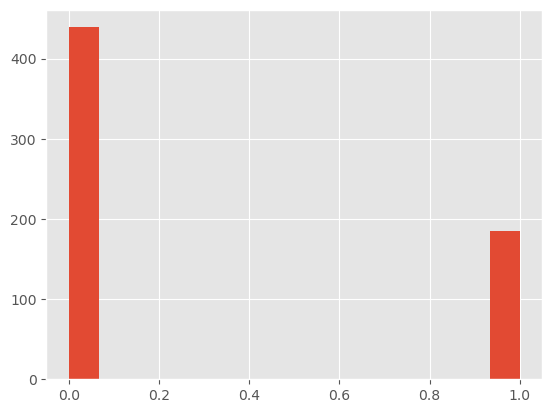

In [182]:
# This shows the data of students who are regular and irregular students 
# It shows imbalances 
plt.hist(final_dataframe['Status'], bins = 15)
plt.show()

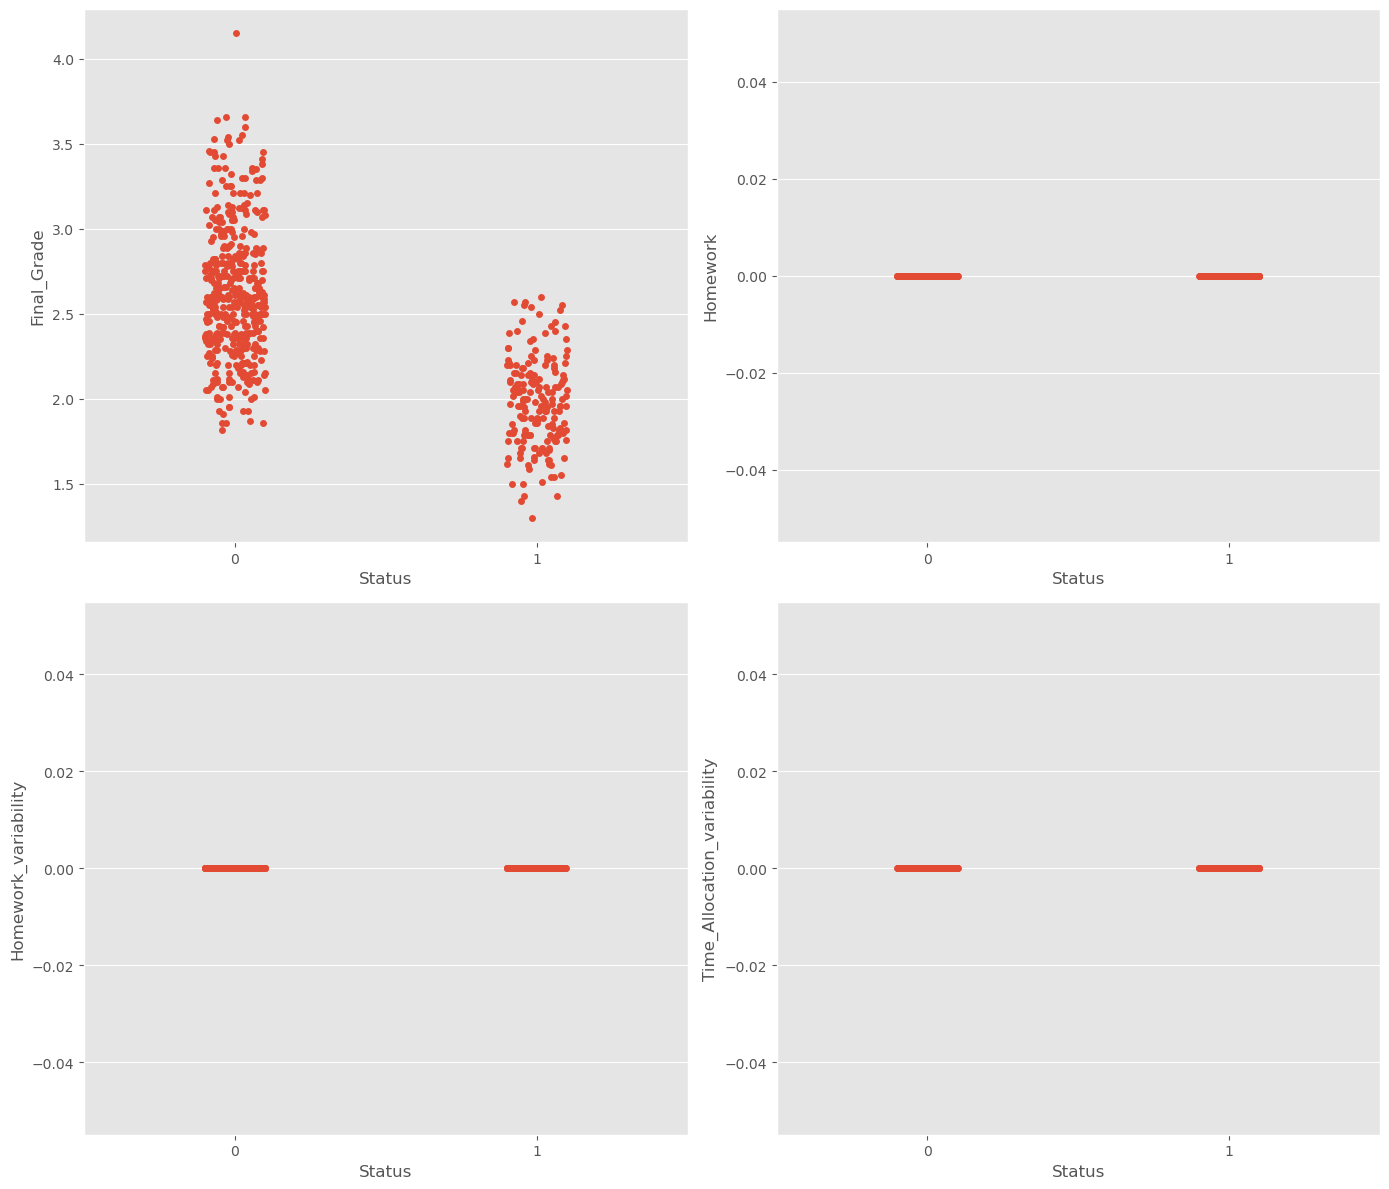

In [183]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.stripplot(ax=axes[0, 0], x='Status', y='Final_Grade', data=final_dataframe)
sns.stripplot(ax=axes[0, 1], x='Status', y='Homework', data=merged_data)
sns.stripplot(ax=axes[1, 0], x='Status', y='Homework_variability', data=merged_data)
sns.stripplot(ax=axes[1, 1], x='Status', y='Time_Allocation_variability', data=merged_data)

plt.tight_layout()
plt.show()


Independent variables are the predictor or the features that will help us predict whether the student has probability to be a irregular student for the next semester or will probably stay as regular student based on their study habits that is gathered through the survey and final grades

Dependent variable is the target variable or what we are trying to know which is the status of the student

In [186]:
# Dependent(y) and Independent(x) Variable segregation 

x = final_dataframe.drop(['Status'], axis=1)
y = final_dataframe['Status']

In [187]:
#Data Spliting (Training and Testing Set)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Interpretation

High positive correlation (close to +1): Survey questions with strong agreement are likely tied to the student’s status/final grade (e.g., good performance or passing).

High negative correlation (close to -1): Strong disagreements might be linked to poorer performance or failure.

Close to 0 correlation: This means the survey question doesn’t have a strong predictive power for the Status.

In [189]:
y_train_df = y_train.rename("Target")

# Concatenate the feature DataFrame (x_train) with the target column (y_train_df)
columnStatus_for_correlation = pd.concat([x_train, y_train_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = columnStatus_for_correlation.corr()

In [190]:
correlation_matrix

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Homework_variability,Time_Allocation_variability,Reading_and_Note_Taking_variability,Study_Period_Procedures_variability,Written_Works_Question_variability,Examination_Question_variability,Teachers_Consultation_variability,Target
Year,1.000000,-0.016760,-0.020183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040534
Final_Grade,-0.016760,1.000000,0.800031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.649970
Subjects_Failed,-0.020183,0.800031,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.752382
Homework,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_Allocation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reading_and_Note_Taking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Study_Period_Procedures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Written_Works_Question,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Examination_Question,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teachers_Consultation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


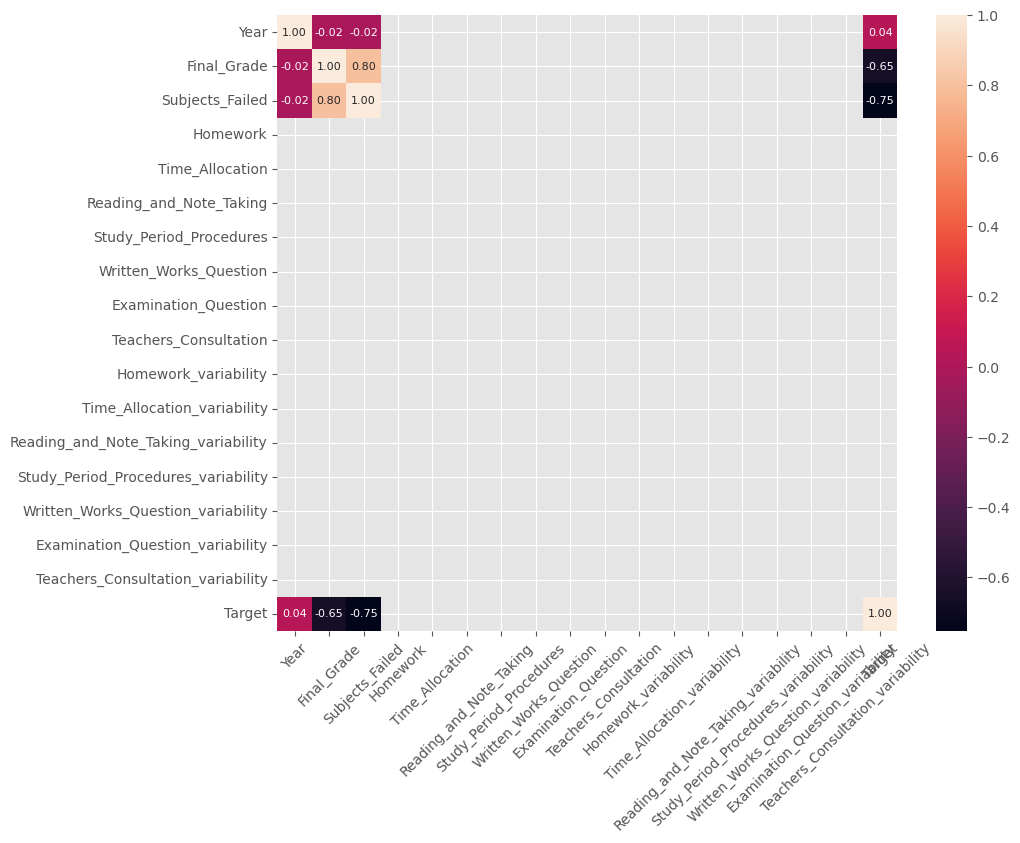

In [191]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 8})
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Rotate y-axis labels
plt.show()

Matrix shows a weak relationship between the some features and the target variable 

TRAINING SVM MODEL

Identifying right hyperparameter 

In [194]:
param_grid_svm = {'C': [0.1, 1, 10, 100],
                'gamma': [1, 0.1, 0.01, 0.001],
                    }  

svc = SVC(kernel='rbf')

grid = GridSearchCV(svc, param_grid_svm, refit=True, verbose=2, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

Creating pipeline to avoid data leakage wherein: 

Standardization, Smote, Model (SVM) are being performed 

In [196]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN

smote = BorderlineSMOTE(random_state=25)

svm_model = SVC(C= 1, gamma= 0.1, kernel='rbf', class_weight= {0: 2, 1: 4})

pipeline_svm = ImbPipeline(steps = [('scaler', StandardScaler()),
                                ('smote', smote),
                                ('classifier', svm_model)])

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

cv_scores = cross_val_score(pipeline_svm, x_train, y_train, cv=kf, scoring='f1')

print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))
print('Standard deviation of cross-validation score:', np.std(cv_scores))

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Standard deviation of cross-validation score: 0.0


In [197]:
# Fit the pipeline on the entire training set
pipeline_svm.fit(x_train, y_train)

# Predict on the test set
y_pred_svm = pipeline_svm.predict(x_test)

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report
test_accuracy = accuracy_score(y_test, y_pred_svm)
print('Test Accuracy:', test_accuracy)

# Print classification report for detailed metrics
print('Classification Report on Test Set:')
print(classification_report(y_test, y_pred_svm))


Test Accuracy: 1.0
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        50

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



TRAINING DECISION TREE

In [199]:
# Feature Selection 

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_l1 = SelectFromModel(LogisticRegression(penalty='l1', C=0.1, solver='liblinear'))

sel_l1.fit(x_train, y_train)

x_train_1 = sel_l1.transform(x_train)
x_test_1 = sel_l1.transform(x_test)

In [200]:
# Convert everything to array

x_train_1 = np.asarray(x_train_1)
x_test_1 = np.asarray(x_test_1)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [201]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9) 

N = x_train_1.shape[0]  # Total number of records in the training data

# Calculate the range for min_samples_leaf
min_leaf_size = int(np.ceil(N * 0.0025))  # 0.25% of the training set
max_leaf_size = int(np.ceil(N * 0.01))    # 1% of the training set

# Example: Set min_samples_leaf to the midpoint of the calculated range
leaf_size = (min_leaf_size + max_leaf_size) // 2

dtc_model = DecisionTreeClassifier(min_samples_leaf=leaf_size, max_depth=5, max_features=None, class_weight= {0: 0.5, 1: 1.5})

pipeline_dtc = ImbPipeline(steps = [('scaler', StandardScaler()),
                                   ('pca', pca),
                                    ('smote', SMOTE(random_state=25)),
                                    ('classifier', dtc_model)])

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

cv_scores = cross_val_score(pipeline_dtc, x_train, y_train, cv=kf, scoring='f1_weighted')


print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))
print('Standard deviation of cross-validation score:', np.std(cv_scores))

Cross-validation scores: [0.95541126 0.95527691 0.97747197 0.95527691 0.95454545 1.
 1.         0.93200523 0.95434758 0.95230058]
Mean cross-validation score: 0.9636635882554279
Standard deviation of cross-validation score: 0.020836057390425256


In [202]:
# Fit the pipeline on the entire training set
pipeline_dtc.fit(x_train, y_train)

# Predict on the test set
y_pred_rf= pipeline_dtc.predict(x_test)

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report
test_accuracy = accuracy_score(y_test, y_pred_rf)
print('Test Accuracy:', test_accuracy)

# Print classification report for detailed metrics
print('Classification Report on Test Set:')
print(classification_report(y_test, y_pred_rf))


Test Accuracy: 0.9574468085106383
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       138
           1       0.88      0.98      0.92        50

    accuracy                           0.96       188
   macro avg       0.93      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188

